In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
url = "https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBF2T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36", 
             "X-Amzn-Trace-Id": "Root=1-63cf0052-760b19697375364569cfc0d0"}

In [4]:
# defining a function
def get_soup(url):
    r = requests.get(url, headers=headers,params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Reviews': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(1,500)):
    soup = get_soup(f'https://www.amazon.in/Redmi-Horizon-Qualcomm%C2%AE-SnapdragonTM-Included/product-reviews/B09QSBF2T7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/499 [00:00<?, ?it/s]

In [7]:
df = pd.DataFrame(reviewlist)

In [8]:
df.head()

,Reviews
0,The first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...
2,50 days usage...1. Good battery LIFE. Bqest fo...
3,Good phone for average users. (4/64 GB)Battery...
4,Good performance... Good touch response... Goo...


In [9]:
df.tail()

,Reviews
4985,If one needs to use this phone only for daily ...
4986,Battery issue battery gets drain i don't know ...
4987,Speaker quality is not good
4988,Quite a smooth daily driver phone. The overall...
4989,Don’t buy this phone its a wrong choice its no...


In [10]:
df.shape

(4990, 1)

In [11]:
df.columns

Index(['Reviews'], dtype='object')

In [12]:
df.duplicated().sum()

4980

In [13]:
df.isnull().sum()

Reviews    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  4990 non-null   object
dtypes: object(1)
memory usage: 39.1+ KB


In [15]:
text_total = " ".join(df["Reviews"])

In [16]:
text_total[:2000]

"The first look of this starbust design is eye catchy...no word to express its design,in hand feel and and it's all physical dimension. the second this which impress me, it's battery backup.....even you playing game hardly for a long time....it gives you sufficient battey backup and charging speed also 33W, is also a good deal at this price. The third impressive factor is it's dual speaker....I have an another phone of 40k and the sound quality is almost same as it. Media playback experience is also enhanced by it's amoled display, very colour charming display...... literally the display quality is unbeatable. The camera notch and dual speaker increase the media playing experience. Other Performance like gaming is also good at this price point. Fingerprint button is also very responsive. All other things and features are good to the price point.Only one thing is very disappointing bcoz the hype of its camera that company shows is very up to the mark and professional photography but the

In [17]:
chars = sorted(list(set(text_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 "&'()*+,-./0123456789:ABCDEFGHIKLMNOPQRSTUVWYabcdefghijklmnopqrstuvwxyz’❤️🌀💙🔋😤
79


In [18]:
df_new = df.copy()

In [19]:
import re 
import string

In [20]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub('😤', "", text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text

cleaning = lambda x: cleaning_text(x)

In [21]:
df_new['Cleaned_Reviews'] = df_new.Reviews.apply(cleaning)

In [22]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...,camera is not so good its averageback camera ...
2,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
3,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
4,Good performance... Good touch response... Goo...,good performance good touch response good batt...
...,...,...
4985,If one needs to use this phone only for daily ...,if one needs to use this phone only for daily ...
4986,Battery issue battery gets drain i don't know ...,battery issue battery gets drain i dont know w...
4987,Speaker quality is not good,speaker quality is not good
4988,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...


In [23]:
clean_total = " ".join(df_new["Cleaned_Reviews"])
chars = sorted(list(set(clean_total)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 0123456789abcdefghijklmnopqrstuvwxyz❤️🌀💙🔋
42


In [24]:
df_new = df_new[df_new['Cleaned_Reviews']!='']

In [25]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...,camera is not so good its averageback camera ...
2,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
3,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
4,Good performance... Good touch response... Goo...,good performance good touch response good batt...
...,...,...
4985,If one needs to use this phone only for daily ...,if one needs to use this phone only for daily ...
4986,Battery issue battery gets drain i don't know ...,battery issue battery gets drain i dont know w...
4987,Speaker quality is not good,speaker quality is not good
4988,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...


In [26]:
from textblob import TextBlob

In [28]:
df_new['Cleaned_Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    the first look of this starbust design is eye ...
1    camera is not so good its  averageback camera ...
2    50 days usage good battery life best for daddy...
3    good phone for average users 464 battery back ...
4    good performance good touch response good batt...
5    if one needs to use this phone only for daily ...
6    battery issue battery gets drain i dont know w...
7                          speaker quality is not good
8    quite a smooth daily driver phone the overall ...
9    dont buy this phone its a wrong choice its not...
Name: Cleaned_Reviews, dtype: object

In [30]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,the first look of this starbust design is eye ...
1,Camera is not so good it's averageBack camera...,camera is not so good its averageback camera ...
2,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest for day...
3,Good phone for average users. (4/64 GB)Battery...,good phone for average users 464 gbbattery bac...
4,Good performance... Good touch response... Goo...,good performance good touch response good batt...
...,...,...
4985,If one needs to use this phone only for daily ...,if one needs to use this phone only for daily ...
4986,Battery issue battery gets drain i don't know ...,battery issue battery gets drain i dont know w...
4987,Speaker quality is not good,speaker quality is not good
4988,Quite a smooth daily driver phone. The overall...,quite a smooth daily driver phone the overall ...


In [31]:
df_new.shape

(4990, 2)

In [32]:
df_new.duplicated().sum()

4980

In [33]:
df_new['Cleaned_Reviews'].duplicated().sum()

4980

In [34]:
df_new.drop_duplicates(subset=['Cleaned_Reviews'], keep=False)

,Reviews,Cleaned_Reviews


In [35]:
df_new.shape

(4990, 2)

In [37]:
freq = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:10]

In [38]:
freq

is        13972
the        9980
for        9980
good       9980
this       6986
camera     6986
and        6986
to         5988
its        5489
you        4491
dtype: int64

In [39]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\hp5cd\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\hp5cd\AppData\Roaming\nl

True

In [40]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [41]:
df_new['Cleaned_Reviews'] = df_new['Cleaned_Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [42]:
df_new

,Reviews,Cleaned_Reviews
0,The first look of this starbust design is eye ...,first look starbust design eye catchyno word e...
1,Camera is not so good it's averageBack camera...,camera good averageback camera good price 💙🌀lo...
2,50 days usage...1. Good battery LIFE. Bqest fo...,50 days usage1 good battery life bqest dayday ...
3,Good phone for average users. (4/64 GB)Battery...,good phone average users 464 gbbattery backup ...
4,Good performance... Good touch response... Goo...,good performance good touch response good batt...
...,...,...
4985,If one needs to use this phone only for daily ...,one needs use phone daily usage purpose best p...
4986,Battery issue battery gets drain i don't know ...,battery issue battery gets drain dont know thi...
4987,Speaker quality is not good,speaker quality good
4988,Quite a smooth daily driver phone. The overall...,quite smooth daily driver phone overall experi...


In [44]:
TextBlob(df_new['Cleaned_Reviews'][4]).ngrams(1)

[WordList(['good']),
 WordList(['performance']),
 WordList(['good']),
 WordList(['touch']),
 WordList(['response']),
 WordList(['good']),
 WordList(['battery']),
 WordList(['life']),
 WordList(['good']),
 WordList(['charging']),
 WordList(['speedaverage']),
 WordList(['camera']),
 WordList(['clarity']),
 WordList(['average']),
 WordList(['led']),
 WordList(['flash']),
 WordList(['lightnote']),
 WordList(['selfie']),
 WordList(['photo']),
 WordList(['lovers']),
 WordList(['dont']),
 WordList(['go']),
 WordList(['average']),
 WordList(['mobile']),
 WordList(['money'])]

In [47]:
TextBlob(df_new['Cleaned_Reviews'][2]).ngrams(2)

[WordList(['50', 'days']),
 WordList(['days', 'usage1']),
 WordList(['usage1', 'good']),
 WordList(['good', 'battery']),
 WordList(['battery', 'life']),
 WordList(['life', 'bqest']),
 WordList(['bqest', 'dayday']),
 WordList(['dayday', 'use']),
 WordList(['use', '33w']),
 WordList(['33w', 'charger']),
 WordList(['charger', 'also']),
 WordList(['also', 'good2']),
 WordList(['good2', 'best']),
 WordList(['best', 'display']),
 WordList(['display', 'shouldve']),
 WordList(['shouldve', '120hz']),
 WordList(['120hz', 'instead']),
 WordList(['instead', '903']),
 WordList(['903', 'sturdy']),
 WordList(['sturdy', 'inhand']),
 WordList(['inhand', 'feel4']),
 WordList(['feel4', 'stereo']),
 WordList(['stereo', 'speaker']),
 WordList(['speaker', 'loud']),
 WordList(['loud', 'crisp6535']),
 WordList(['crisp6535', 'split5']),
 WordList(['split5', 'camera']),
 WordList(['camera', 'average']),
 WordList(['average', 'good']),
 WordList(['good', 'concerning']),
 WordList(['concerning', 'price6']),
 Word

In [48]:
TextBlob(df_new['Cleaned_Reviews'][3]).ngrams(3)

[WordList(['good', 'phone', 'average']),
 WordList(['phone', 'average', 'users']),
 WordList(['average', 'users', '464']),
 WordList(['users', '464', 'gbbattery']),
 WordList(['464', 'gbbattery', 'backup']),
 WordList(['gbbattery', 'backup', 'good']),
 WordList(['backup', 'good', 'last']),
 WordList(['good', 'last', 'one']),
 WordList(['last', 'one', 'day']),
 WordList(['one', 'day', 'normal']),
 WordList(['day', 'normal', 'usage']),
 WordList(['normal', 'usage', 'use']),
 WordList(['usage', 'use', 'continue']),
 WordList(['use', 'continue', 'gps']),
 WordList(['continue', 'gps', 'results']),
 WordList(['gps', 'results', 'may']),
 WordList(['results', 'may', 'vary']),
 WordList(['may', 'vary', 'get']),
 WordList(['vary', 'get', '1011']),
 WordList(['get', '1011', 'hrs']),
 WordList(['1011', 'hrs', 'backupheating']),
 WordList(['hrs', 'backupheating', 'issues']),
 WordList(['backupheating', 'issues', 'much']),
 WordList(['issues', 'much', 'lessbattery']),
 WordList(['much', 'lessbattery

In [49]:
freq_Sw = pd.Series(' '.join(df_new['Cleaned_Reviews']).split()).value_counts()[:20] 

In [50]:
freq_Sw

good           9980
camera         6986
dont           4491
battery        4491
also           3493
phone          3493
average        2495
charging       2495
price          2495
display        1996
quality        1996
great          1996
life           1996
use            1497
120hz          1497
experience     1497
speaker        1497
performance    1497
quite          1497
daily          1497
dtype: int64

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
print(word_freq_df.sort_values('occurrences',ascending = False).head())

        term  occurrences  frequency
117     good         9980   0.048193
42    camera         6986   0.033735
28   battery         4990   0.024096
78      dont         4491   0.021687
185    phone         3493   0.016867


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df_new["Cleaned_Reviews"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

In [54]:
df1 = pd.DataFrame(denselist, columns = names_features)

In [55]:
df1

,10,100,1011,120hz,1257,33w,33watt,40k,464,4g,...,video,watchers,way,web,website,wifi,word,working,wrong,y2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.067587,0.000000,0.085519,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.085519,0.000000,0.085519,0.000000,0.000000,0.085519
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.212641,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.101258,0.128125,0.101258,0.000000,0.000000,0.000000,0.25625,...,0.000000,0.128125,0.128125,0.128125,0.000000,0.128125,0.000000,0.000000,0.000000,0.000000
3,0.163288,0.163288,0.163288,0.000000,0.000000,0.000000,0.000000,0.000000,0.163288,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.328249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4988,0.000000,0.000000,0.000000,0.261404,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [58]:
top2_words = get_top_n2_words(df_new["Cleaned_Reviews"], n=200) 
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,battery life,1996
1,good price,1497
2,camera good,1497
3,charging speed,998
4,also good,998


[Text(0, 0, 'battery life'),
 Text(1, 0, 'good price'),
 Text(2, 0, 'camera good'),
 Text(3, 0, 'charging speed'),
 Text(4, 0, 'also good'),
 Text(5, 0, 'dont buy'),
 Text(6, 0, 'buy phone'),
 Text(7, 0, 'good battery'),
 Text(8, 0, 'camera average'),
 Text(9, 0, 'dont know'),
 Text(10, 0, 'first look'),
 Text(11, 0, 'look starbust'),
 Text(12, 0, 'starbust design'),
 Text(13, 0, 'design eye'),
 Text(14, 0, 'eye catchyno'),
 Text(15, 0, 'catchyno word'),
 Text(16, 0, 'word express'),
 Text(17, 0, 'express designin'),
 Text(18, 0, 'designin hand'),
 Text(19, 0, 'hand feel')]

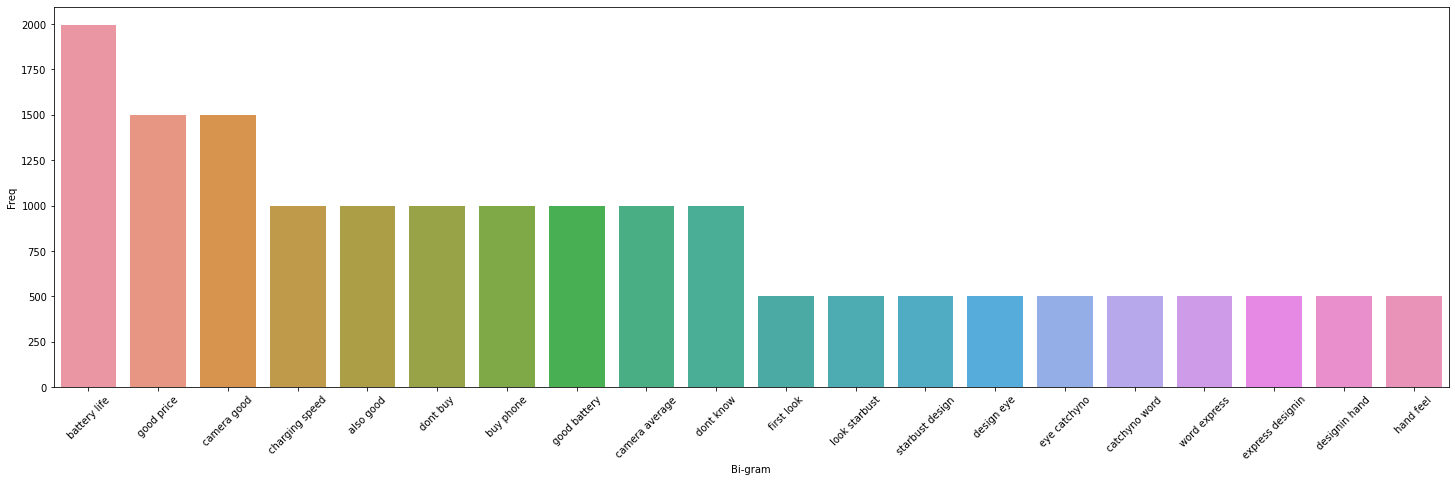

In [59]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [60]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [61]:
top3_words = get_top_n3_words(df_new["Cleaned_Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,good battery life,998
1,first look starbust,499
2,look starbust design,499
3,starbust design eye,499
4,design eye catchyno,499
...,...,...
195,price6 buggy uiminor,499
196,buggy uiminor expected,499
197,uiminor expected ui13,499
198,expected ui13 way,499


[Text(0, 0, 'good battery life'),
 Text(1, 0, 'first look starbust'),
 Text(2, 0, 'look starbust design'),
 Text(3, 0, 'starbust design eye'),
 Text(4, 0, 'design eye catchyno'),
 Text(5, 0, 'eye catchyno word'),
 Text(6, 0, 'catchyno word express'),
 Text(7, 0, 'word express designin'),
 Text(8, 0, 'express designin hand'),
 Text(9, 0, 'designin hand feel'),
 Text(10, 0, 'hand feel physical'),
 Text(11, 0, 'feel physical dimension'),
 Text(12, 0, 'physical dimension second'),
 Text(13, 0, 'dimension second impress'),
 Text(14, 0, 'second impress battery'),
 Text(15, 0, 'impress battery backupeven'),
 Text(16, 0, 'battery backupeven playing'),
 Text(17, 0, 'backupeven playing game'),
 Text(18, 0, 'playing game hardly'),
 Text(19, 0, 'game hardly long')]

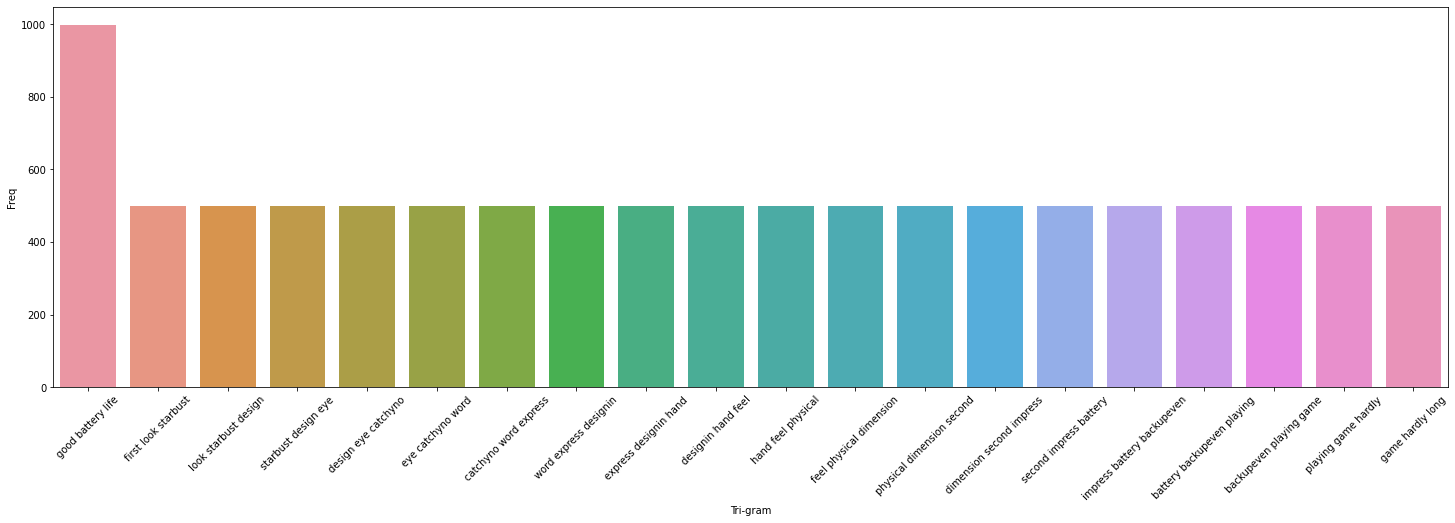

In [62]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (25, 7))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [63]:
string_total = " ".join(df_new["Cleaned_Reviews"])
string_total[:2000]

'first look starbust design eye catchyno word express designin hand feel physical dimension second impress battery backupeven playing game hardly long timeit gives sufficient battey backup charging speed also 33w also good deal price third impressive factor dual speakeri another phone 40k sound quality almost media playback experience also enhanced amoled display colour charming display literally display quality unbeatable camera notch dual speaker increase media playing experience performance like gaming also good price point fingerprint button also responsive things features good price pointonly one thing disappointing bcoz hype camera company shows mark professional photography camera lower gradeeven old redmi y2 exchanged better camera plz request dont buy camerajust dont images shown camera pictures website illustration according mei dont recommend buy phone camera phoneif non camera user surely go itpros design inhand feel battery charging amoled displaydual speakercons camera ca

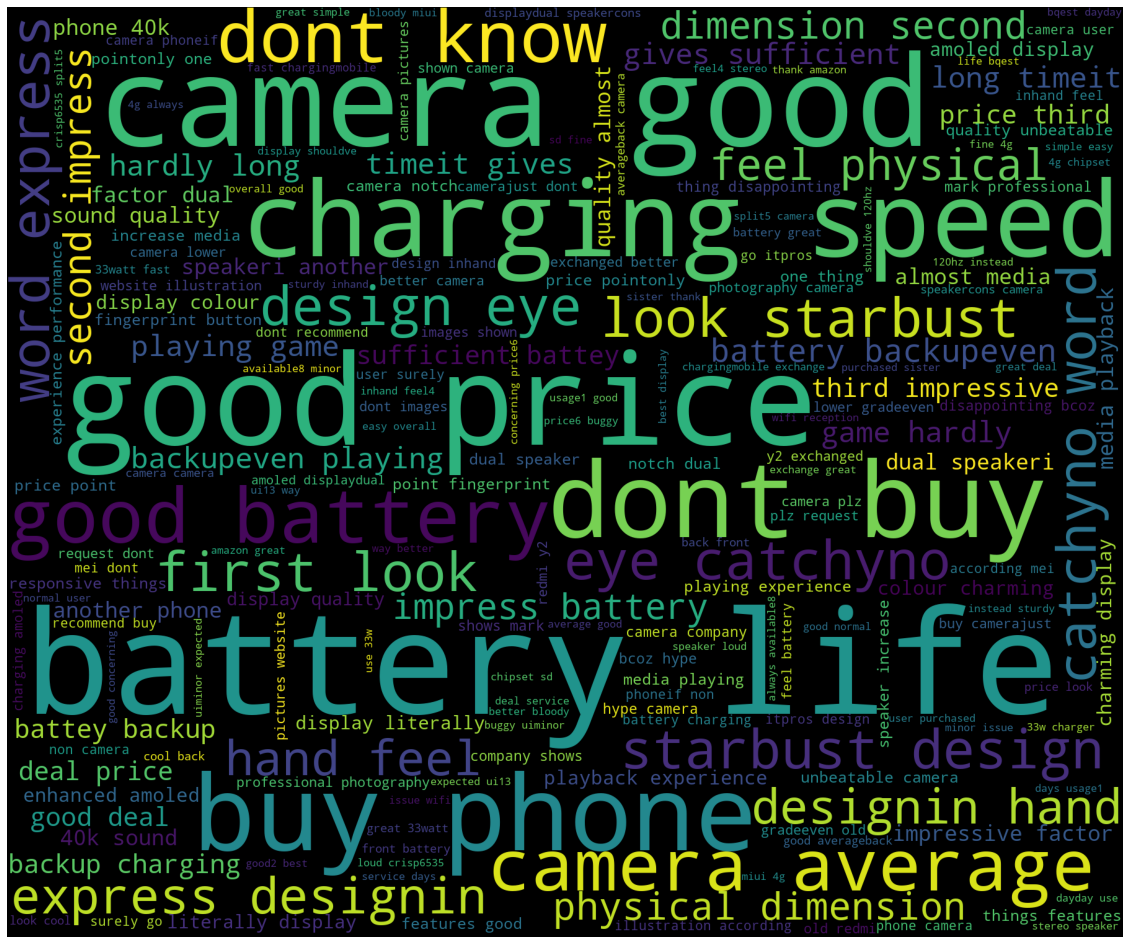

In [65]:
from wordcloud import WordCloud
wordcloud_generator = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_total)
fig = plt.figure(figsize = (20,20))
plt.imshow(wordcloud_generator)
plt.axis('off')
plt.show()

In [66]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [68]:
fetch_sentiment_using_textblob = df_new.Cleaned_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(fetch_sentiment_using_textblob.value_counts())

,Cleaned_Reviews
positive,4491
negative,499


In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp5cd\AppData\Roaming\nltk_data...


True

In [70]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(df_new.Cleaned_Reviews[4])

{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.9493}

In [71]:
df_score=pd.DataFrame()
df_score['Cleaned_Reviews'] = df_new.Cleaned_Reviews
df_score['scores'] = df_new['Cleaned_Reviews'].apply(lambda review: sid.polarity_scores(review))
df_score['compound']  = df_score['scores'].apply(lambda scores: scores['compound'])
df_score['sentiment'] = df_score['compound'].apply(lambda c: 'Positive' if c >=0.75 else ('Negative' if c<=-0.75  else 'Neutral'))

In [72]:
df_score

,Cleaned_Reviews,scores,compound,sentiment
0,first look starbust design eye catchyno word e...,"{'neg': 0.045, 'neu': 0.717, 'pos': 0.238, 'co...",0.9824,Positive
1,camera good averageback camera good price 💙🌀lo...,"{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'comp...",0.9796,Positive
2,50 days usage1 good battery life bqest dayday ...,"{'neg': 0.033, 'neu': 0.743, 'pos': 0.224, 'co...",0.9432,Positive
3,good phone average users 464 gbbattery backup ...,"{'neg': 0.071, 'neu': 0.791, 'pos': 0.138, 'co...",0.6369,Neutral
4,good performance good touch response good batt...,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'comp...",0.9493,Positive
...,...,...,...,...
4985,one needs use phone daily usage purpose best p...,"{'neg': 0.111, 'neu': 0.694, 'pos': 0.194, 'co...",0.4203,Neutral
4986,battery issue battery gets drain dont know thi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4987,speaker quality good,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,Neutral
4988,quite smooth daily driver phone overall experi...,"{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'comp...",0.9434,Positive


In [73]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

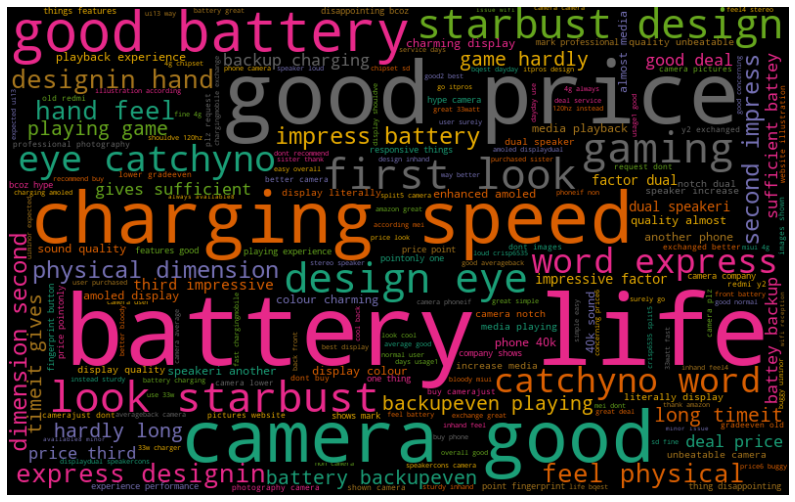

In [74]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Positive']])
generate_wordcloud(all_words)

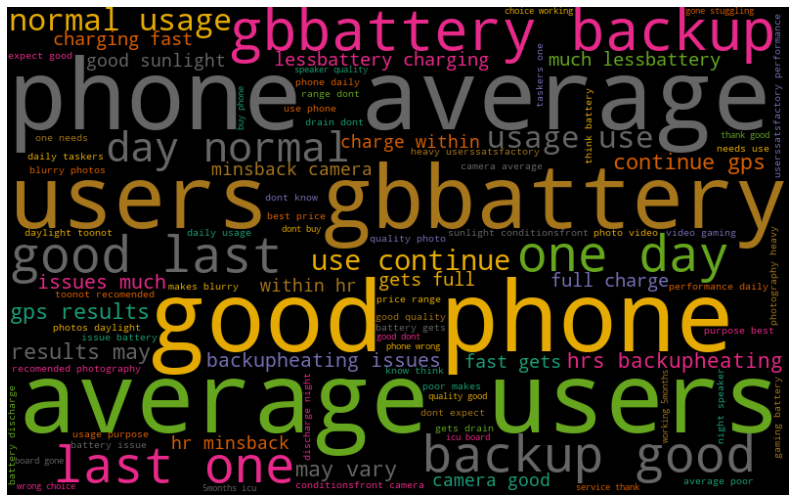

In [75]:
all_words = ' '.join([text for text in df_score['Cleaned_Reviews'][df_score.sentiment == 'Neutral']])
generate_wordcloud(all_words)

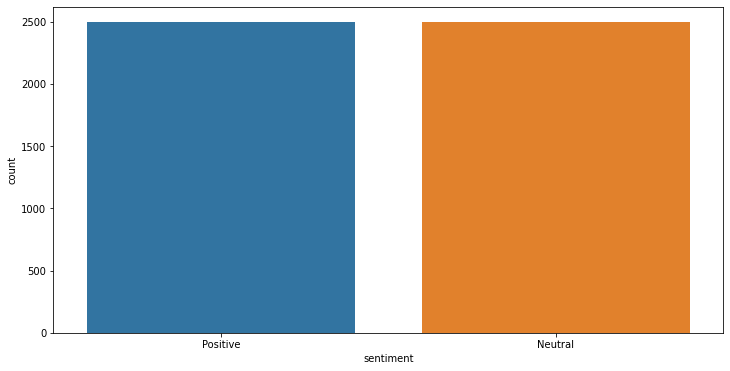

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df_score)
plt.show()

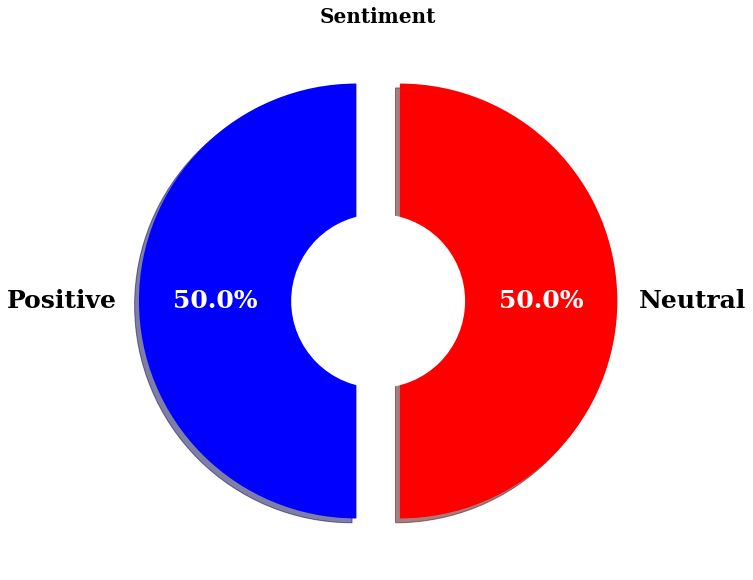

In [78]:
label_data = df_score['sentiment'].value_counts()

explode = (0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='white')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Sentiment', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()